In [1]:
import tensorflow as tf
from tensorflow import keras as K

In [2]:
K.__version__, tf.__version__

('2.4.0', '2.4.1')

In [3]:
fashion_mnist = K.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train_full.shape, x_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
x_val, x_train = x_train_full[: 5000]/255.0, x_train_full[5000: ]/255.0
y_val, y_train = y_train_full[: 5000], y_train_full[5000: ]
x_test = x_test/255.0

In [6]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
y_train[: 10], class_names[y_train[0]]

(array([4, 0, 7, 9, 9, 9, 4, 4, 3, 4], dtype=uint8), 'Coat')

In [8]:
model = K.models.Sequential()
model.add(K.layers.Flatten(input_shape=[28, 28]))
model.add(K.layers.Dense(300, activation="relu"))
model.add(K.layers.Dense(100, activation="relu"))
model.add(K.layers.Dense(10, activation="softmax"))

In [9]:
model = K.models.Sequential([
    K.layers.Flatten(input_shape=[28, 28]),
    K.layers.Dense(300, activation="relu"),
    K.layers.Dense(100, activation="relu"),
    K.layers.Dense(10, activation="softmax"),
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


**Dense** 층은 보통 많은 파라미터를 가짐. 이런 모델은 학습 데이터를 학습하기 충분한 유연성을 가짐.  
하지만 과대적합의 위험을 갖는다는 의미이기도 함. 특히 학습 데이터가 많지 않을 경우 그럼.

In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [13]:
model.get_layer("dense_3") is hidden1

True

In [14]:
w, b = hidden1.get_weights()
w

array([[ 0.00507998, -0.0172832 , -0.01421513, ..., -0.02415837,
        -0.05362556,  0.06917812],
       [ 0.05174185,  0.01856454,  0.01513926, ..., -0.03275179,
        -0.06312246, -0.0339331 ],
       [-0.06389727,  0.05131353,  0.03327258, ..., -0.03818387,
        -0.01569896,  0.04575983],
       ...,
       [-0.02310992,  0.02415276,  0.00404581, ..., -0.00604156,
        -0.05874261, -0.06982646],
       [-0.02531566, -0.00474527,  0.00914269, ...,  0.04932997,
         0.0477524 , -0.03310689],
       [-0.07368131, -0.02665125, -0.01355319, ...,  0.01144794,
         0.04115019,  0.00829829]], dtype=float32)

In [15]:
w.shape

(784, 300)

In [16]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
b.shape

(300,)

Dense층은 보다시치 연결 가중치를 무작위로 초기화하고 편향은 0으로 초기화함.  
다른 초기화 방법을 사용하고 싶다면 층을 만들 때 **kernel_initializer(커널은 연결 가중치의 또다른 이름)** 와 **bias_initializer** 매개변수를 설정하면 됨.

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

**loss** 를 그냥 categorical_crossentropy가 아닌 sparse_categorical_crossentropy를 사용한 이유는  
샘플마다 클래스별 타겟 확률을 갖고 있는게 아니기 때문. 즉 원-핫 인코딩 된 상태라면 그냥 categorical_crossentropy 사용.

In [19]:
hist = model.fit(x_train, y_train, epochs=30,
                validation_data=(x_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 1.0031 - accuracy: 0.6837 - val_loss: 0.5771 - val_accuracy: 0.7796
Epoch 2/30
1719/1719 [==============================] - 1s 824us/step - loss: 0.5060 - accuracy: 0.8242 - val_loss: 0.4389 - val_accuracy: 0.8566
Epoch 3/30
1719/1719 [==============================] - 1s 796us/step - loss: 0.4449 - accuracy: 0.8459 - val_loss: 0.4114 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 1s 787us/step - loss: 0.4189 - accuracy: 0.8563 - val_loss: 0.4109 - val_accuracy: 0.8580
Epoch 5/30
1719/1719 [==============================] - 1s 794us/step - loss: 0.3896 - accuracy: 0.8620 - val_loss: 0.3926 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 1s 803us/step - loss: 0.3728 - accuracy: 0.8675 - val_loss: 0.3889 - val_accuracy: 0.8636
Epoch 7/30
1719/1719 [==============================] - 1s 800us/step - loss: 0.3610 - accuracy: 0.8745 - val_loss: 0.3841 - v

어떤 클래스는 많이 등장하고 다른 클래스는 조금 등장하는 등 학습데이터셋이 편중되어 있다면 fit()메서드를 호출할 때  
**class_weight** 매개변수를 지정하는 것이 좋음. 적게 등장하는 클래스에 높은 가중치를 부여하고 많이 등장하는 클래스는 낮은 가중치를 부여함.  
샘플별로 가중치를 부여하고 싶다면 **sample_weight** 매개변수를 지정하면 됨.  
class_weight와 sample_weight 모두 지정하면 케라스는 손실함수를 계싼할 때 두 값을 곱하여 사용함.  
>어떤 샘플은 전문가에 의해 레이블링되고 어떤 샘플은 대충 레이블링되었다면 sample_weight가 도움이 될 수 있음

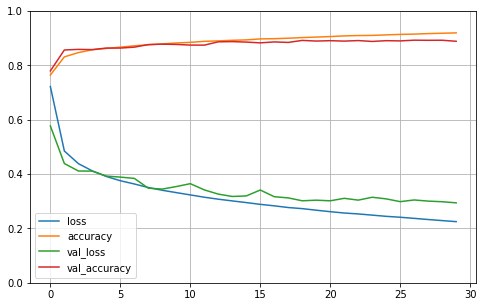

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
hist.history

{'loss': [0.7220292091369629,
  0.48489436507225037,
  0.43857184052467346,
  0.411621630191803,
  0.391204833984375,
  0.3755856156349182,
  0.3635728061199188,
  0.3505435585975647,
  0.3403894603252411,
  0.3317984640598297,
  0.3233390748500824,
  0.314893513917923,
  0.3075959384441376,
  0.30128079652786255,
  0.2951340973377228,
  0.28863394260406494,
  0.28316861391067505,
  0.27692848443984985,
  0.2729053199291229,
  0.2671005129814148,
  0.26166802644729614,
  0.2567269206047058,
  0.2533577084541321,
  0.24899037182331085,
  0.2445341944694519,
  0.2411579191684723,
  0.23707140982151031,
  0.23279312252998352,
  0.22882847487926483,
  0.22502018511295319],
 'accuracy': [0.7643818259239197,
  0.8312363624572754,
  0.846927285194397,
  0.8574363589286804,
  0.8622000217437744,
  0.8670363426208496,
  0.8719090819358826,
  0.8758181929588318,
  0.8789818286895752,
  0.8822727203369141,
  0.8847454786300659,
  0.8883636593818665,
  0.8899818062782288,
  0.8921636343002319,
  0

**hist.history** 특성에는 학습셋과 검증셋에 대한 손실과 측정지표가 담겨있음.  
그래프를 보면 검증곡선이 훈련곡선과 거의 비슷함. 크게 과대적합되지 않았다는 증거임.

In [25]:
hist.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

---
모델 하이퍼파라미터 튜닝  
> 1. 학습률 튜닝  
2. 학습률이 도움이 되지 않으면 다른 옵티마이저 테스트(학습률도 다시 튜닝)   
3. 모델의 층 개수, 층에 있는 뉴런 개수, 은닉층이 사용하는 활성함수 튜닝  


In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 472us/step - loss: 0.3300 - accuracy: 0.8815


[0.3300413191318512, 0.8815000057220459]

In [27]:
x_new = x_test[: 3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
import numpy as np

y_pred = model.predict_classes(x_new)
y_pred, np.array(class_names)[y_pred]

(array([9, 2, 1], dtype=int64),
 array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10'))

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def plot_img(img_vecs, r=10):
    if len(img_vecs) >= r:
        it = r
    else:
        it = len(img_vecs)
    
    if it == 0:
        return
    else:
        fir_img_vec = img_vecs[0]
        fir_img = fir_img_vec.reshape(28, 28)

        for i in range(1, it):
            temp_img_vec = img_vecs[i]
            temp_img = temp_img_vec.reshape(28, 28)
            fir_img = np.hstack([fir_img, temp_img])
        print(fir_img.shape)
        
        plt.imshow(fir_img, cmap="gray")
        plt.show()

(28, 84)


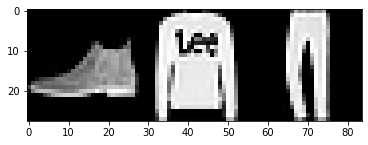

In [36]:
plot_img(x_test[: 3])

옳게 분류된 모습